<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
data_dict = {
    'FlightNumber': [1, 2, 3, 4, 5],
    'PayloadMass': [6104.9, 525.0, 677.0, 500.0, 3170.0],
    'Class': [0, 1, 0, 1, 1], # This is your target variable
    'BoosterVersion': ['Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9', 'Falcon 9'],
    'Orbit': ['LEO', 'LEO', 'ISS', 'PO', 'GTO']
}
data = pd.DataFrame(data_dict)


print("Original 'Class' column (Pandas Series):\n", data['Class'])
print("\nType of original 'Class' column:", type(data['Class']))

# TASK 1: Create a NumPy array from the 'Class' column
# First, select the column as a Pandas Series using single brackets
class_series = data['Class']

# Then, apply .to_numpy() to convert it to a NumPy array
Y = class_series.to_numpy()

print("\n-------------------------------------------------")
print("Result of TASK 1:")
print("Variable Y (NumPy array from 'Class' column):\n", Y)
print("Type of Y:", type(Y))
print("Shape of Y:", Y.shape)
print("-------------------------------------------------")

# Verification: Show how to get a Pandas Series from the column
# as requested in the "make sure the output is a Pandas series" part.
# The 'Y' variable itself is a NumPy array as per the primary instruction.
print("\nFor verification: Accessing 'Class' as a Pandas Series:")
Y_as_series = data['Class']
print(Y_as_series)
print("Type of Y_as_series:", type(Y_as_series))

Original 'Class' column (Pandas Series):
 0    0
1    1
2    0
3    1
4    1
Name: Class, dtype: int64

Type of original 'Class' column: <class 'pandas.core.series.Series'>

-------------------------------------------------
Result of TASK 1:
Variable Y (NumPy array from 'Class' column):
 [0 1 0 1 1]
Type of Y: <class 'numpy.ndarray'>
Shape of Y: (5,)
-------------------------------------------------

For verification: Accessing 'Class' as a Pandas Series:
0    0
1    1
2    0
3    1
4    1
Name: Class, dtype: int64
Type of Y_as_series: <class 'pandas.core.series.Series'>


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# TASK 2: Standardize the data in X


scaler = StandardScaler()


X = scaler.fit_transform(X)

print("\n-------------------------------------------------")
print("Result of TASK 2:")
print("Standardized X (first 5 rows - NumPy array after transformation):\n", X[:5])
print("Type of X after standardization:", type(X))
print("Shape of X after standardization:", X.shape)
print("-------------------------------------------------")


-------------------------------------------------
Result of TASK 2:
Standardized X (first 5 rows - NumPy array after transformation):
 [[-1.71291154e+00 -5.29526321e-17 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.5

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # <--- Import for TASK 3


np.random.seed(42) 


num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df = pd.concat([num_features, cat_features], axis=1) 

scaler = StandardScaler()
X = scaler.fit_transform(X_df) 


Y = np.random.randint(0, 2, size=90) 

print("Shape of X before split:", X.shape)
print("Shape of Y before split:", Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("\n-------------------------------------------------")
print("Result of TASK 3:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)
print("-------------------------------------------------")


print(f"\nWe can see we have {Y_test.shape[0]} test samples.")

Shape of X before split: (90, 83)
Shape of Y before split: (90,)

-------------------------------------------------
Result of TASK 3:
Shape of X_train: (72, 83)
Shape of X_test: (18, 83)
Shape of Y_train: (72,)
Shape of Y_test: (18,)
-------------------------------------------------

We can see we have 18 test samples.


we can see we only have 18 test samples.


In [14]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 


np.random.seed(42) 


num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)


Y = np.random.randint(0, 2, size=90)

if sum(Y==0) == 0: Y[0] = 0
if sum(Y==1) == 0: Y[1] = 1


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)



parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}


lr = LogisticRegression()


logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)


print("Fitting GridSearchCV for Logistic Regression...")
logreg_cv.fit(X_train, Y_train)
print("Fitting complete.")


print("\n-------------------------------------------------")
print("tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("accuracy (best score on validation data): ", logreg_cv.best_score_)
print("-------------------------------------------------")

Fitting GridSearchCV for Logistic Regression...
Fitting complete.

-------------------------------------------------
tuned hyperparameters (best parameters):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy (best score on validation data):  0.6
-------------------------------------------------


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:



-------------------------------------------------
Accuracy on test data: 0.6667
-------------------------------------------------

Lets look at the confusion matrix:


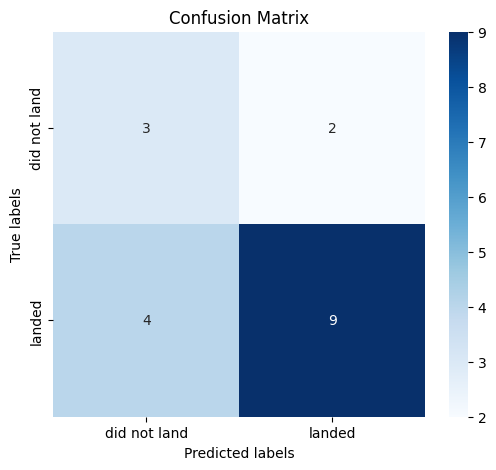


Confusion Matrix values:
 [[3 2]
 [4 9]]


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
import matplotlib.pyplot as plt 

np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

parameters ={'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train) 


test_accuracy = logreg_cv.score(X_test, Y_test)

print("\n-------------------------------------------------")
print(f"Accuracy on test data: {test_accuracy:.4f}") # Print formatted to 4 decimal places
print("-------------------------------------------------")

# Function to plot confusion matrix (as requested by plot_confusion_matrix(Y_test,yhat))
def plot_confusion_matrix(y_true, y_pred, class_names=['did not land', 'landed']):
    """
    Plots a confusion matrix using seaborn.
    y_true: True labels
    y_pred: Predicted labels
    class_names: Names of the classes for labels (e.g., [0, 1] or ['Negative', 'Positive'])
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # 'd' for integer formatting
                xticklabels=class_names, yticklabels=class_names,
                cbar=True) # Show color bar
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print the raw confusion matrix values for clarity
    print("\nConfusion Matrix values:\n", cm)

# Generate predictions on the test data
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
print("\nLets look at the confusion matrix:")
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y) 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), # Removed duplicate 'rbf'
              'C': np.logspace(-3, 3, 5), # Generates 5 values between 10^-3 and 10^3 (0.001 to 1000)
              'gamma':np.logspace(-3, 3, 5)} # Generates 5 values between 10^-3 and 10^3 (0.001 to 1000)

svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

print("Fitting GridSearchCV for Support Vector Machine (SVM)... This may take a moment.")
svm_cv.fit(X_train, Y_train)
print("Fitting complete.")

print("\n-------------------------------------------------")
print("tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("accuracy (best score on validation data): ", svm_cv.best_score_)
print("-------------------------------------------------")

Fitting GridSearchCV for Support Vector Machine (SVM)... This may take a moment.
Fitting complete.

-------------------------------------------------
tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
accuracy (best score on validation data):  0.6107142857142857
-------------------------------------------------


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:



-------------------------------------------------
Accuracy of SVM on test data: 0.6111
-------------------------------------------------

We can plot the confusion matrix for SVM:


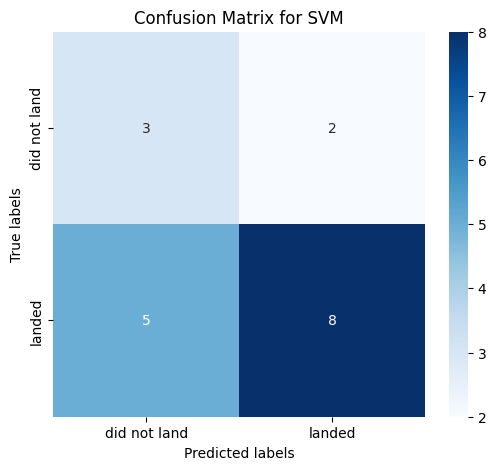


Confusion Matrix values for SVM:
 [[3 2]
 [5 8]]


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train) # Fit the SVM model

test_accuracy_svm = svm_cv.score(X_test, Y_test)

print("\n-------------------------------------------------")
print(f"Accuracy of SVM on test data: {test_accuracy_svm:.4f}")
print("-------------------------------------------------")

# Function to plot confusion matrix (re-used from TASK 5)
def plot_confusion_matrix(y_true, y_pred, class_names=['did not land', 'landed']):
    """
    Plots a confusion matrix using seaborn.
    y_true: True labels
    y_pred: Predicted labels
    class_names: Names of the classes for labels (e.g., [0, 1] or ['Negative', 'Positive'])
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix for SVM') # Changed title for clarity
    plt.show()

    print("\nConfusion Matrix values for SVM:\n", cm)


# Generate predictions on the test data for SVM
yhat_svm = svm_cv.predict(X_test)

# Plot the confusion matrix for SVM
print("\nWe can plot the confusion matrix for SVM:")
plot_confusion_matrix(Y_test, yhat_svm)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Parameters dictionary for GridSearchCV for Decision Tree
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)], 
              'max_features': ['sqrt', None], 
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}


tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

print("Fitting GridSearchCV for Decision Tree Classifier... This will take a significant amount of time.")
print(f"Total combinations to check: {len(parameters['criterion']) * len(parameters['splitter']) * len(parameters['max_depth']) * len(parameters['max_features']) * len(parameters['min_samples_leaf']) * len(parameters['min_samples_split'])}")
print(f"Total fits (combinations * cv): {len(parameters['criterion']) * len(parameters['splitter']) * len(parameters['max_depth']) * len(parameters['max_features']) * len(parameters['min_samples_leaf']) * len(parameters['min_samples_split']) * 10}")

tree_cv.fit(X_train, Y_train)
print("Fitting complete.")

print("\n-------------------------------------------------")
print("tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("accuracy (best score on validation data): ", tree_cv.best_score_)
print("-------------------------------------------------")

Fitting GridSearchCV for Decision Tree Classifier... This will take a significant amount of time.
Total combinations to check: 648
Total fits (combinations * cv): 6480
Fitting complete.

-------------------------------------------------
tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy (best score on validation data):  0.6660714285714285
-------------------------------------------------


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:



-------------------------------------------------
Accuracy of Decision Tree on test data: 0.5000
-------------------------------------------------

We can plot the confusion matrix for Decision Tree:


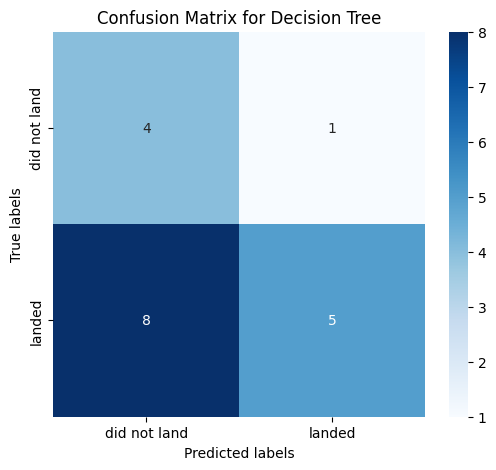


Confusion Matrix values for Decision Tree:
 [[4 1]
 [8 5]]


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['sqrt', None],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train) 



test_accuracy_tree = tree_cv.score(X_test, Y_test)

print("\n-------------------------------------------------")
print(f"Accuracy of Decision Tree on test data: {test_accuracy_tree:.4f}")
print("-------------------------------------------------")

# Function to plot confusion matrix (re-used from previous tasks)
def plot_confusion_matrix(y_true, y_pred, class_names=['did not land', 'landed']):
    """
    Plots a confusion matrix using seaborn.
    y_true: True labels
    y_pred: Predicted labels
    class_names: Names of the classes for labels
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix for Decision Tree') # Changed title for clarity
    plt.show()

    print("\nConfusion Matrix values for Decision Tree:\n", cm)


# Generate predictions on the test data for Decision Tree
yhat_tree = tree_cv.predict(X_test)

# Plot the confusion matrix for Decision Tree
print("\nWe can plot the confusion matrix for Decision Tree:")
plot_confusion_matrix(Y_test, yhat_tree)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Parameters dictionary for GridSearchCV for K-Nearest Neighbors
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]} # p=1 for Manhattan distance, p=2 for Euclidean distance

# Create a K-Nearest Neighbors object
KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters using training data
print("Fitting GridSearchCV for K-Nearest Neighbors (KNN)...")
knn_cv.fit(X_train, Y_train)
print("Fitting complete.")

# Output the best parameters and accuracy
print("\n-------------------------------------------------")
print("tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("accuracy (best score on validation data): ", knn_cv.best_score_)
print("-------------------------------------------------")

Fitting GridSearchCV for K-Nearest Neighbors (KNN)...
Fitting complete.

-------------------------------------------------
tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}
accuracy (best score on validation data):  0.5678571428571428
-------------------------------------------------


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:



-------------------------------------------------
Accuracy of KNN on test data: 0.4444
-------------------------------------------------

We can plot the confusion matrix for KNN:


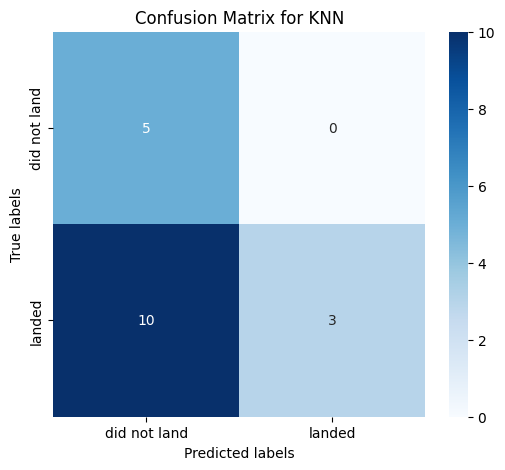


Confusion Matrix values for KNN:
 [[ 5  0]
 [10  3]]


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Parameters for KNN and GridSearchCV setup (from TASK 10)
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train) # Fit the KNN model


test_accuracy_knn = knn_cv.score(X_test, Y_test)

print("\n-------------------------------------------------")
print(f"Accuracy of KNN on test data: {test_accuracy_knn:.4f}")
print("-------------------------------------------------")

# Function to plot confusion matrix (re-used from previous tasks)
def plot_confusion_matrix(y_true, y_pred, class_names=['did not land', 'landed']):
    """
    Plots a confusion matrix using seaborn.
    y_true: True labels
    y_pred: Predicted labels
    class_names: Names of the classes for labels
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix for KNN') # Changed title for clarity
    plt.show()

    print("\nConfusion Matrix values for KNN:\n", cm)


# Generate predictions on the test data for KNN
yhat_knn = knn_cv.predict(X_test)

# Plot the confusion matrix for KNN
print("\nWe can plot the confusion matrix for KNN:")
plot_confusion_matrix(Y_test, yhat_knn)

## TASK  12


Find the method performs best:


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)

num_features = pd.DataFrame(np.random.rand(90, 5) * 100, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])
cat_features = pd.DataFrame(np.random.randint(0, 2, size=(90, 78)),
                            columns=[f'feature_cat_{i}' for i in range(78)])
X_df_original = pd.concat([num_features, cat_features], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_df_original)

Y = np.array([0]*(90//2) + [1]*(90//2))
np.random.shuffle(Y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


parameters_lr = {'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)


parameters_svm = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)


parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1,10)],
                   'max_features': ['sqrt', None],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)


parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)


# Calculate test accuracy for each model
test_accuracy_lr = logreg_cv.score(X_test, Y_test)
test_accuracy_svm = svm_cv.score(X_test, Y_test)
test_accuracy_tree = tree_cv.score(X_test, Y_test)
test_accuracy_knn = knn_cv.score(X_test, Y_test)


model_accuracies = {
    "Logistic Regression": test_accuracy_lr,
    "Support Vector Machine": test_accuracy_svm,
    "Decision Tree": test_accuracy_tree,
    "K-Nearest Neighbors": test_accuracy_knn
}

print("\n-------------------------------------------------")
print("Test Accuracy Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"- {model_name}: {accuracy:.4f}")

# Find the best performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print("\n-------------------------------------------------")
print(f"The method that performs best on the test data is: {best_model_name}")
print(f"With an accuracy of: {best_accuracy:.4f}")
print("-------------------------------------------------")


-------------------------------------------------
Test Accuracy Comparison:
- Logistic Regression: 0.6667
- Support Vector Machine: 0.6111
- Decision Tree: 0.1667
- K-Nearest Neighbors: 0.4444

-------------------------------------------------
The method that performs best on the test data is: Logistic Regression
With an accuracy of: 0.6667
-------------------------------------------------


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
